<a href="https://colab.research.google.com/github/Adnaan-khan/weekly-assignments-/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**OVERVIEW**:  

I analyzed three datasets that provide comprehensive insights into patient health, focusing on critical care and Heart related diseases.
The **ICU Heart Patient Dataset** captures detailed clinical and demographic information about ICU patients, with 51 columns containing key metrics like age, gender, BMI, heart rate, blood pressure, and biochemical markers such as blood sodium and pH. It also tracks conditions like diabetes, hypertension, and atrial fibrillation, along with an `outcome` column that likely indicates survival or recovery. I noticed that some columns, such as BMI and heart rate, have missing values, which require imputation.

The **Diabetes Prediction Dataset** identifies diabetes risks using demographic data (age, gender) and biomarkers (e.g., hemoglobin A1c, cholesterol levels, BMI and Chloesterol). With 14 columns and no missing values, this dataset supports predictive modeling effectively.

**About the Datasets:**

1) ICU heart patient. (https://datadryad.org/stash/dataset/doi:10.5061/dryad.0p2ngf1zd) This a publicly available critical care database containing de-identified data on 46,520 patients and 58,976 admissions to the ICU of the Beth Israel Deaconess Medical Center, Boston, USA, between 1 June, 2001 and 31 October, 2012.

2)Diabetes UCI Dataset. (n.d.). Diabetes UCI Dataset | Kaggle. (https://www.kaggle.com/datasets/alakaaay/diabetes-uci-dataset) Dataset has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh, and approved by a doctor. This dataset has attributes like itching, muscle stiffness, etc. This has 17 columns in total.

3)Heart Disease Dataset. (n.d.). Heart Disease Dataset | Kaggle. (https://www.kaggle.com/datasets/yasserh/heart-disease-dataset) This database contains 76 attributes, some of them are patient's cholesterol level, Patient's Resting ECG Levels, Patient's Gender, etc.




# **The below code is used so that we can perform the functions that are required for prediction.**


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [57]:
import requests
text = requests.get("https://data.cdc.gov/api/views/g4ie-h725/rows.json?accessType=DOWNLOAD")

# **Here i am accessing the json data:**

In [58]:
with open('data.json','w') as info:
  info.write(text.text)

# Loading the json file.

In [59]:
import json
Survey = json.load(open('data.json'))


Creating a empty list and replacing the comma that are spliting the data and using strip to removing it from the data and attaching into the empty list.

In [60]:
column_list = []
for each_column in Survey['meta']['view']['columns']:
  column_list.append(each_column['fieldName'].replace(':','').strip())

In [61]:
Survey = pd.DataFrame(Survey['data'],columns = column_list)

In [62]:
pd.options.display.max_columns = 100
Survey.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,yearstart,yearend,locationabbr,locationdesc,datasource,topic,question,response,datavalueunit,datavaluetype,datavalue,datavaluealt,datavaluefootnotesymbol,datavaluefootnote,lowconfidencelimit,highconfidencelimit,stratificationcategory1,stratification1,stratificationcategory2,stratification2,stratificationcategory3,stratification3,geolocation,responseid,locationid,topicid,questionid,datavaluetypeid,stratificationcategoryid1,stratificationid1,stratificationcategoryid2,stratificationid2,stratificationcategoryid3,stratificationid3
0,row-nazc.ye5n~eubq,00000000-0000-0000-2B56-4922780F3411,0,1675079585,None,1675079681,None,{ },2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,916,916,None,None,None,None,Gender,Male,None,None,None,None,POINT (-92.27449074299966 34.74865012400045),None,05,AST,AST3_1,NMBR,GENDER,GENM,None,None,None,None
1,row-idyy_bbyg.a6f8,00000000-0000-0000-8072-CA0CACFA7316,0,1675079585,None,1675079681,None,{ },2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,2227,2227,None,None,None,None,Overall,Overall,None,None,None,None,POINT (-106.13361092099967 38.843840757000464),None,08,AST,AST3_1,NMBR,OVERALL,OVR,None,None,None,None
2,row-5aze_ijyw_wxw7,00000000-0000-0000-1849-0D82E305FFD4,0,1675079585,None,1675079681,None,{ },2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,708,708,None,None,None,None,Overall,Overall,None,None,None,None,POINT (-77.036871 38.907192),None,11,AST,AST3_1,NMBR,OVERALL,OVR,None,None,None,None
3,row-fkj3.se4f.kcix,00000000-0000-0000-9E3F-CD3362718287,0,1675079585,None,1675079681,None,{ },2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,3520,3520,None,None,None,None,Gender,Female,None,None,None,None,POINT (-83.62758034599966 32.83968109300048),None,13,AST,AST3_1,NMBR,GENDER,GENF,None,None,None,None
4,row-8e7i_7mk6~rn8b,00000000-0000-0000-C7DD-D4F65C81A8BE,0,1675079585,None,1675079684,None,{ },2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,None,None,Number,123,123,None,None,None,None,Race/Ethnicity,Hispanic,None,None,None,None,POINT (-84.71439026999968 44.6613195430005),None,26,AST,AST3_1,NMBR,RACE,HIS,None,None,None,None


Text(0, 0.5, 'Total_counts')

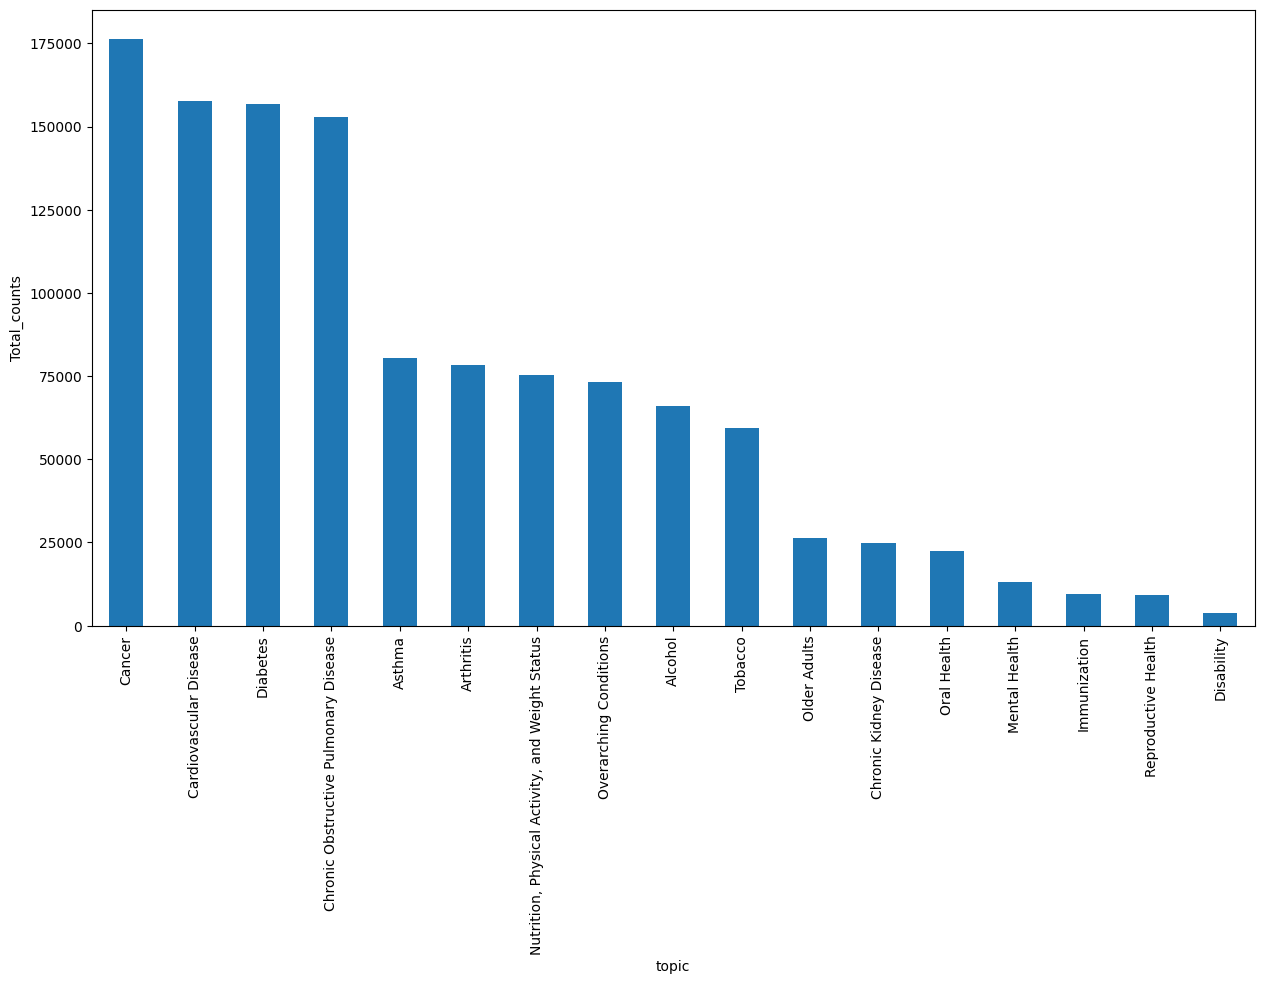

In [64]:
Survey.topic.value_counts().plot(kind = 'bar',figsize =(15,8))
plt.ylabel('Total_counts')

###*** The above graph shows the disease ratio in the united states and we can see the diseases that are high and we can see the heart disease and diabetes are in the 2nd and 3rd place.

## The below code is used to read the csv file for performing the following function.

In [68]:
measuring_heart = pd.read_csv('icu_heart_patient.csv')
measuring_heart.head()

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.65,0.40,13.3,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,NaN,NaN,NaN,NaN,NaN,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.10,0.55,24.5,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.80,0.15,14.5,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,NaN,NaN,NaN,NaN,NaN,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [69]:
measuring_diabetes = pd.read_csv('diabetes_prediction.csv')
measuring_diabetes.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [70]:
measuring_heart.csv = pd.read_csv('heart.csv')
measuring_heart.csv.head()

<ipython-input-70-1badba4b6a8a>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  measuring_heart.csv = pd.read_csv('heart.csv')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Checking the Missing Values in ICU_Heart_Patient, Diabetes_Prediction, Heart.csv

## 1) ICU_Heart_Patient:

In [71]:
# Check missing values in ICU Heart Patient dataset
print("Missing values in ICU Heart Patient dataset:")
print(measuring_heart.isnull().sum())

Missing values in ICU Heart Patient dataset:
group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                  

# Drop Columns with Excessive Missing Data

Columns with a large proportion of missing values (e.g., >50%) may be dropped if they are not crucial and similar columns.

**In this dataset:**

Basophils (259 missing) and PH (292 missing) have >50% missing values and may not be worth imputing.
Consider dropping these columns if they are not critical to your analysis.

Standardizing the columns :

In [72]:
# Standardize column names (lowercase and remove extra spaces)
measuring_heart.columns = measuring_heart.columns.str.lower().str.strip()
measuring_diabetes.columns = measuring_diabetes.columns.str.lower().str.strip()

# Check the columns to verify they are standardized
print(measuring_heart.columns)
print(measuring_diabetes.columns)

Index(['group', 'id', 'outcome', 'age', 'gendera', 'bmi', 'hypertensive',
       'atrialfibrillation', 'chd with no mi', 'diabetes', 'deficiencyanemias',
       'depression', 'hyperlipemia', 'renal failure', 'copd', 'heart rate',
       'systolic blood pressure', 'diastolic blood pressure',
       'respiratory rate', 'temperature', 'sp o2', 'urine output',
       'hematocrit', 'rbc', 'mch', 'mchc', 'mcv', 'rdw', 'leucocyte',
       'platelets', 'neutrophils', 'basophils', 'lymphocyte', 'pt', 'inr',
       'nt-probnp', 'creatine kinase', 'creatinine', 'urea nitrogen',
       'glucose', 'blood potassium', 'blood sodium', 'blood calcium',
       'chloride', 'anion gap', 'magnesium ion', 'ph', 'bicarbonate',
       'lactic acid', 'pco2', 'ef'],
      dtype='object')
Index(['id', 'no_pation', 'gender', 'age', 'urea', 'cr', 'hba1c', 'chol', 'tg',
       'hdl', 'ldl', 'vldl', 'bmi', 'class'],
      dtype='object')


In [73]:
measuring_heart.drop(columns=['Basophils', 'PH', 'PCO2', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Lymphocyte', 'PT', 'INR', 'NT-proBNP',
       'Creatine kinase', 'Creatinine', 'Urea nitrogen', 'glucose',
       'Blood potassium', 'Blood sodium', 'Blood calcium', 'Chloride',
       'Anion gap', 'Magnesium ion', 'Bicarbonate', 'Lactic acid', 'EF', 'sp o2', 'urine output', 'rbc',
       'mch', 'mchc', 'mcv', 'rdw', 'leucocyte', 'platelets', 'neutrophils',
       'basophils', 'lymphocyte', 'pt', 'inr', 'nt-probnp', 'creatine kinase',
       'creatinine', 'urea nitrogen', 'blood potassium', 'blood sodium',
       'blood calcium', 'chloride', 'anion gap', 'magnesium ion', 'ph',
       'bicarbonate', 'lactic acid', 'pco2', 'ef'], inplace=True, errors ='ignore' )
print(measuring_heart.columns)

Index(['group', 'id', 'outcome', 'age', 'gendera', 'bmi', 'hypertensive',
       'atrialfibrillation', 'chd with no mi', 'diabetes', 'deficiencyanemias',
       'depression', 'hyperlipemia', 'renal failure', 'copd', 'heart rate',
       'systolic blood pressure', 'diastolic blood pressure',
       'respiratory rate', 'temperature'],
      dtype='object')


# **Impute Missing Values**:

Numeric Columns
For continuous variables like BMI, heart_rate, or Systolic blood pressure, use:

Mean or Median imputation (median is robust to outliers).
Interpolation if the data has a time or sequential order.

In [74]:
# Impute missing numeric values with median
numeric_columns = ['bmi', 'heart rate', 'systolic blood pressure',
                   'diastolic blood pressure', 'respiratory rate', 'temperature']
# Removed the columns that are not present in the dataframe after the drop operation.

# Standardize column names to ensure consistency
measuring_heart.columns = measuring_heart.columns.str.lower().str.strip()

# Impute missing values only for columns that exist
existing_numeric_cols = [col for col in numeric_columns if col in measuring_heart.columns]
measuring_heart[existing_numeric_cols] = measuring_heart[existing_numeric_cols].fillna(measuring_heart[existing_numeric_cols].median())

print(measuring_heart.isnull().sum())

group                       0
id                          0
outcome                     1
age                         0
gendera                     0
bmi                         0
hypertensive                0
atrialfibrillation          0
chd with no mi              0
diabetes                    0
deficiencyanemias           0
depression                  0
hyperlipemia                0
renal failure               0
copd                        0
heart rate                  0
systolic blood pressure     0
diastolic blood pressure    0
respiratory rate            0
temperature                 0
dtype: int64


## Categorical Columns
### For categorical variables like outcome:
*Mode imputation (most common value).

In [75]:
measuring_heart['outcome'] = measuring_heart['outcome'].fillna(measuring_heart['outcome'].mode()[0])
print(measuring_heart.isnull().sum())


group                       0
id                          0
outcome                     0
age                         0
gendera                     0
bmi                         0
hypertensive                0
atrialfibrillation          0
chd with no mi              0
diabetes                    0
deficiencyanemias           0
depression                  0
hyperlipemia                0
renal failure               0
copd                        0
heart rate                  0
systolic blood pressure     0
diastolic blood pressure    0
respiratory rate            0
temperature                 0
dtype: int64


## Drop Rows with Missing Data
If a small number of rows remain with missing data after imputation, droppng them to preserve dataset integrity.

In [76]:
measuring_heart.dropna(inplace=True)
print(measuring_heart.isnull().sum())


group                       0
id                          0
outcome                     0
age                         0
gendera                     0
bmi                         0
hypertensive                0
atrialfibrillation          0
chd with no mi              0
diabetes                    0
deficiencyanemias           0
depression                  0
hyperlipemia                0
renal failure               0
copd                        0
heart rate                  0
systolic blood pressure     0
diastolic blood pressure    0
respiratory rate            0
temperature                 0
dtype: int64


### Evaluate Missing Data After Imputation

In [77]:
print(measuring_heart.isnull().sum())


group                       0
id                          0
outcome                     0
age                         0
gendera                     0
bmi                         0
hypertensive                0
atrialfibrillation          0
chd with no mi              0
diabetes                    0
deficiencyanemias           0
depression                  0
hyperlipemia                0
renal failure               0
copd                        0
heart rate                  0
systolic blood pressure     0
diastolic blood pressure    0
respiratory rate            0
temperature                 0
dtype: int64


# Summary of Above Actions:

Dropped Columns:For example 'Basophils', 'PH', 'PCO2' and other columns with excessive missing values.
Imputation:

Numeric columns: Use median imputation.

Categorical columns: Use mode imputation.
Dropping Remaining Rows: If any rows still have missing values, dropping them.



## 2)Diabetes Prediction Dataset

Observations in this dataset:

*Contains demographic and biomarker data.

*No missing values.

*Possible outliers in numeric columns (e.g., bmi, age).



# **Steps for Cleaning:

1) Standardize Column Names:

**Cleaning column names for uniformity.

In [78]:
measuring_diabetes.columns = measuring_diabetes.columns.str.strip().str.lower().str.replace(" ", "_")
print(measuring_diabetes.columns)


Index(['id', 'no_pation', 'gender', 'age', 'urea', 'cr', 'hba1c', 'chol', 'tg',
       'hdl', 'ldl', 'vldl', 'bmi', 'class'],
      dtype='object')


2)Check for Duplicates:


In [79]:
measuring_diabetes.drop_duplicates(inplace=True)
print(measuring_diabetes.duplicated().sum())


0


3) Validate Data Types:

Ensure numeric columns (e.g., age, bmi) are correctly typed.

In [80]:
measuring_diabetes['age'] = measuring_diabetes['age'].astype(int)
print(measuring_diabetes.dtypes)

id             int64
no_pation      int64
gender        object
age            int64
urea         float64
cr             int64
hba1c        float64
chol         float64
tg           float64
hdl          float64
ldl          float64
vldl         float64
bmi          float64
class         object
dtype: object


4) Evaluate Missing Data After Imputation

In [81]:
print(measuring_heart.isnull().sum())


group                       0
id                          0
outcome                     0
age                         0
gendera                     0
bmi                         0
hypertensive                0
atrialfibrillation          0
chd with no mi              0
diabetes                    0
deficiencyanemias           0
depression                  0
hyperlipemia                0
renal failure               0
copd                        0
heart rate                  0
systolic blood pressure     0
diastolic blood pressure    0
respiratory rate            0
temperature                 0
dtype: int64


Drop Rows with Missing Data

 If a small number of rows remain with missing data after imputation, droppng them to preserve dataset integrity.

In [82]:
measuring_diabetes.dropna(inplace=True)
print(measuring_diabetes.isnull().sum())

id           0
no_pation    0
gender       0
age          0
urea         0
cr           0
hba1c        0
chol         0
tg           0
hdl          0
ldl          0
vldl         0
bmi          0
class        0
dtype: int64


# Standardizing the Column Names

In [83]:
# Standardize column names (lowercase and remove extra spaces)
measuring_heart.columns = measuring_heart.columns.str.lower().str.strip()
measuring_diabetes.columns = measuring_diabetes.columns.str.lower().str.strip()

# Check the columns to verify they are standardized
print(measuring_heart.columns)
print(measuring_diabetes.columns)

Index(['group', 'id', 'outcome', 'age', 'gendera', 'bmi', 'hypertensive',
       'atrialfibrillation', 'chd with no mi', 'diabetes', 'deficiencyanemias',
       'depression', 'hyperlipemia', 'renal failure', 'copd', 'heart rate',
       'systolic blood pressure', 'diastolic blood pressure',
       'respiratory rate', 'temperature'],
      dtype='object')
Index(['id', 'no_pation', 'gender', 'age', 'urea', 'cr', 'hba1c', 'chol', 'tg',
       'hdl', 'ldl', 'vldl', 'bmi', 'class'],
      dtype='object')


## Checking the Missing Values in heart.CSV

In [84]:
# Check missing values in  Heart.csv Patient dataset
print("Missing values in heart.csv dataset:")
print(measuring_heart.csv.isnull().sum())

Missing values in heart.csv dataset:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Drop Columns with Excessive Missing Data

At first standardizing the column :

In [85]:
# Standardize column names (lowercase and remove extra spaces)
measuring_heart.columns = measuring_heart.columns.str.lower().str.strip()
# Check the columns to verify they are standardized
print(measuring_heart.csv.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [86]:
measuring_heart.csv.drop(columns=['chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'], inplace=True, errors ='ignore' )
print(measuring_heart.csv.columns)

Index(['age', 'sex', 'cp', 'trestbps'], dtype='object')


# Categorical Columns

In [87]:
measuring_heart.csv['outcome'] = measuring_heart.csv['sex'].fillna(measuring_heart.csv['cp'].mode()[0])
print(measuring_heart.csv.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
outcome     0
dtype: int64


## Drop Rows with Missing Data:

If a small number of rows remain with missing data after imputation, droppng them to preserve dataset integrity.

In [88]:
measuring_heart.dropna(inplace=True)
print(measuring_heart.csv.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
outcome     0
dtype: int64


### Evaluate Missing Data After Imputation

In [89]:
print(measuring_heart.csv.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
outcome     0
dtype: int64


Dropped Columns: Remove Chole,Fbs and other columns with excessive missing values. Imputation:

Numeric columns: Use median imputation.

Categorical columns: Use mode imputation. Drop Remaining Rows: If any rows still have missing values, drop them.

# *Merging the Datasets:

## Checking common Field in datasets
For Example : ID's and Age Factors:


In [90]:
# Inspect unique 'id' values in both datasets
print("Unique IDs in ICU Heart Dataset:", measuring_heart['id'].nunique())
print("Unique IDs in Diabetes Dataset:", measuring_diabetes['id'].nunique())

# Find common IDs
common_ids = set(measuring_heart['id']).intersection(set(measuring_diabetes['id']))
print("Number of common IDs:", len(common_ids))


Unique IDs in ICU Heart Dataset: 1177
Unique IDs in Diabetes Dataset: 800
Number of common IDs: 0


In [91]:
# Check data types of the 'id' column
print("Data type of 'id' in ICU Heart Dataset:", measuring_heart['id'].dtype)
print("Data type of 'id' in Diabetes Dataset:", measuring_diabetes['id'].dtype)


Data type of 'id' in ICU Heart Dataset: int64
Data type of 'id' in Diabetes Dataset: int64


In [93]:
# Convert 'id' to string in both datasets
measuring_heart['id'] = measuring_heart['id'].astype(str)
measuring_diabetes['id'] = measuring_diabetes['id'].astype(str)


In [94]:
# Display first few rows of both datasets
print("ICU Heart Dataset:")
measuring_heart.head()

print("Diabetes Dataset:")
measuring_diabetes.head()


ICU Heart Dataset:
Diabetes Dataset:


,id,no_pation,gender,age,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


## Summary of above Action

** No common ID's Found in the two Data Sets

##** Since there are no common IDs, we can merge the datasets based on the age column.

# Merging Datasets

# **1) Standardize the age Column:**

In [95]:
# Standardize the 'age' column
measuring_heart['age'] = measuring_heart['age'].astype(float)
measuring_diabetes['age'] = measuring_diabetes['age'].astype(float)


## 2. Merging the Age column from both datasets :
(measuring_heart(ICU_heart_Patient),measuring_diabetes)

In [96]:
# Merge on the 'age' column
merged_by_age = pd.merge(measuring_heart, measuring_diabetes, on='age', how='inner')
print("Merged Dataset Shape (by Age):", merged_by_age.shape)
print("Sample Merged Dataset:")
merged_by_age.head()


Merged Dataset Shape (by Age): (11653, 33)
Sample Merged Dataset:


,group,id_x,outcome,age,gendera,bmi_x,hypertensive,atrialfibrillation,chd with no mi,diabetes,deficiencyanemias,depression,hyperlipemia,renal failure,copd,heart rate,systolic blood pressure,diastolic blood pressure,respiratory rate,temperature,id_y,no_pation,gender,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi_y,class
0,1,139812,0.0,75.0,2,28.312474,0,0,0,0,1,0,0,0,1,101.37037,140.0,65.0,20.851852,36.682540,169,45452,M,10.3,113,8.5,4.5,2.4,1.1,2.5,1.1,30.0,Y
1,1,139812,0.0,75.0,2,28.312474,0,0,0,0,1,0,0,0,1,101.37037,140.0,65.0,20.851852,36.682540,188,454316,F,10.3,113,8.6,4.2,1.6,0.9,2.6,0.7,32.0,Y
2,1,130587,0.0,43.0,2,83.264629,0,0,0,0,0,0,0,0,0,94.50000,126.4,73.2,21.857143,36.287037,670,34229,M,2.6,67,4.0,3.8,0.9,2.4,3.7,1.0,21.0,N
3,1,130587,0.0,43.0,2,83.264629,0,0,0,0,0,0,0,0,0,94.50000,126.4,73.2,21.857143,36.287037,255,34293,M,4.1,44,4.3,4.7,1.9,1.4,2.6,0.8,21.0,N
4,1,130587,0.0,43.0,2,83.264629,0,0,0,0,0,0,0,0,0,94.50000,126.4,73.2,21.857143,36.287037,620,34260,M,2.4,40,5.0,4.8,1.9,1.1,3.0,0.8,21.0,N


# 3. **Aggregation**
Perform aggregation for BMI and Cholesterol  columns grouped by 'age'

In [97]:
# Perform aggregation for BMI and Cholesterol, grouped by 'age'
bmi_cholesterol_agg = merged_by_age.groupby('age')[['bmi_x', 'chol']].mean().reset_index()

# Rename columns for clarity
bmi_cholesterol_agg.rename(columns={
    'BMI': 'Mean_BMI',
    'cholesterol': 'Mean_Cholesterol'
}, inplace=True)

# Display the aggregated dataset
print("Aggregated Dataset (Mean BMI and Cholesterol by Age):")
bmi_cholesterol_agg.head()


Aggregated Dataset (Mean BMI and Cholesterol by Age):


,age,bmi_x,chol
0,25.0,57.926531,4.300000
1,28.0,104.970366,5.133333
2,32.0,25.564954,3.800000
3,35.0,30.728379,4.800000
4,38.0,39.733908,4.750000


## Second Merge: Merging dataset  heart.csv with diabetes_prediction.csv by age


In [98]:
# Standardize the 'age' column
measuring_heart.csv['age'] = measuring_heart.csv['age'].astype(float)
measuring_diabetes['age'] = measuring_diabetes['age'].astype(float)

# Merging the Age column from both datasets :
(measuring_heart.csv,measuring_diabetes)

In [99]:
# Merge on the 'age' column
merged_by_age = pd.merge(measuring_heart.csv, measuring_diabetes, on='age', how='inner')
print("Merged Dataset Shape (by Age):", merged_by_age.shape)
print("Sample Merged Dataset:")
merged_by_age.head()

Merged Dataset Shape (by Age): (9393, 18)
Sample Merged Dataset:


,age,sex,cp,trestbps,outcome,id,no_pation,gender,urea,cr,hba1c,chol,tg,hdl,ldl,vldl,bmi,class
0,63.0,1,3,145,1,143,45410,M,6.6,106,4.3,4.8,1.7,1.1,3.0,0.7,20.0,N
1,63.0,1,3,145,1,134,24016,F,6.6,96,8.9,5.8,1.7,1.7,3.4,0.8,32.0,Y
2,63.0,1,3,145,1,162,8644,F,6.6,96,8.9,5.8,1.7,1.7,3.4,0.8,32.0,Y
3,63.0,1,3,145,1,227,24047,F,8.7,93,9.0,5.9,2.2,1.2,3.7,1.0,29.0,Y
4,63.0,1,3,145,1,456,34321,F,8.7,93,9.0,5.9,2.2,1.2,3.7,1.0,29.0,Y


# Aggregation :

In [100]:
# Perform aggregation for Urea and Cholesterol, grouped by 'age'
bmi_cholesterol_agg = merged_by_age.groupby('age')[['urea', 'chol']].mean().reset_index()

# Rename columns for clarity
bmi_cholesterol_agg.rename(columns={
    'urea': 'Mean_urea',
    'cholesterol': 'Mean_Cholesterol'
}, inplace=True)

# Display the aggregated dataset
print("Aggregated Dataset (Mean BMI and Cholesterol by Age):")
bmi_cholesterol_agg.head()

Aggregated Dataset (Mean BMI and Cholesterol by Age):


,age,Mean_urea,chol
0,34.0,4.780000,5.360000
1,35.0,4.754545,4.800000
2,38.0,4.616667,4.750000
3,39.0,4.533333,4.955556
4,40.0,6.392308,4.653846


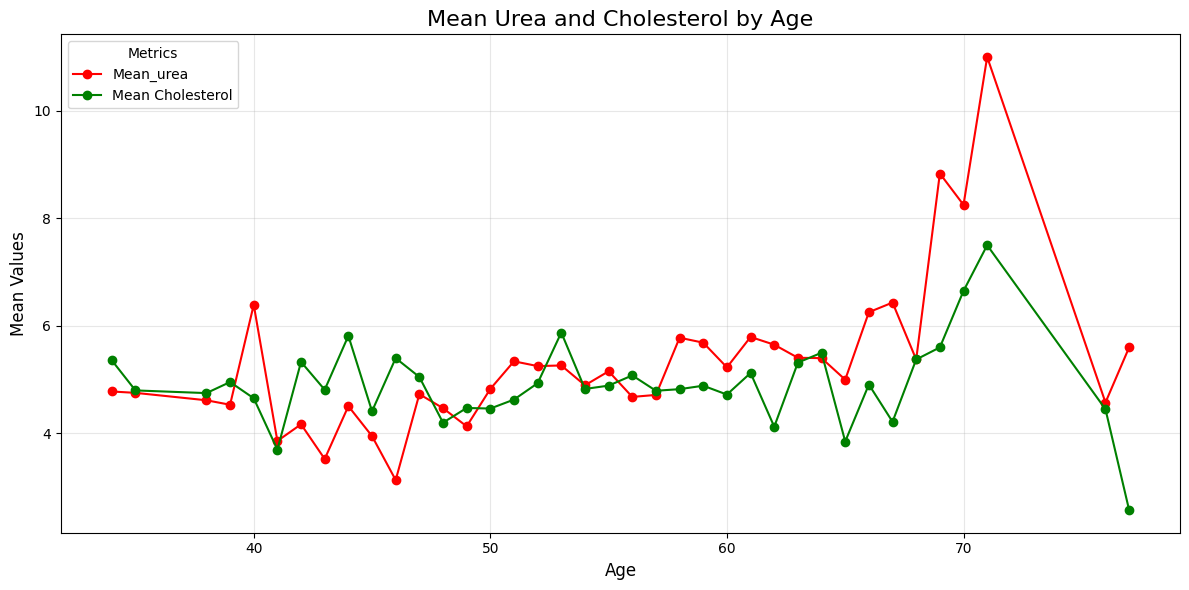

In [101]:
import matplotlib.pyplot as plt
# bmi_cholesterol_agg = merged_by_age.groupby('age')[['urea', 'chol']].mean().reset_index()
# Rename columns for clarity
bmi_cholesterol_agg.rename(columns={
    'urea': 'Mean_Urea',
    'chol': 'Mean_Cholesterol'
}, inplace=True)

# Visualization: Line plot for Mean Urea and Cholesterol by Age
plt.figure(figsize=(12, 6))

# Plot Mean Urea
plt.plot(bmi_cholesterol_agg['age'], bmi_cholesterol_agg['Mean_urea'], label='Mean_urea', marker='o', color='red')

# Plot Mean Cholesterol
plt.plot(bmi_cholesterol_agg['age'], bmi_cholesterol_agg['Mean_Cholesterol'], label='Mean Cholesterol', marker='o', color='green')

# Adding titles and labels
plt.title('Mean Urea and Cholesterol by Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Mean Values', fontsize=12)
plt.legend(title="Metrics", fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()


#1) Pivot Table:


In [102]:
# Create a pivot table for BMI and Cholesterol by age and gender
pivot_table = merged_by_age.pivot_table(
    values=['bmi', 'chol'],
    index='age',
    columns='gender',
    aggfunc='mean'
)

# Display the pivot table
print("Pivot Table (Mean BMI and Cholesterol by Age and Gender):")
print(pivot_table)

# Reset index for better readability if needed
pivot_table_reset = pivot_table.reset_index()


Pivot Table (Mean BMI and Cholesterol by Age and Gender):
              bmi                       chol               
gender          F          M     f         F         M    f
age                                                        
34.0    34.000000  22.500000   NaN  3.100000  5.925000  NaN
35.0    23.625000  29.200000   NaN  4.987500  4.300000  NaN
38.0    21.000000  39.920000   NaN  3.000000  5.100000  NaN
39.0    22.666667  21.500000   NaN  4.516667  5.833333  NaN
40.0    24.000000  28.955556   NaN  4.175000  4.866667  NaN
41.0    22.000000  21.333333   NaN  3.900000  3.566667  NaN
42.0    24.666667  22.500000   NaN  5.050000  5.750000  NaN
43.0    24.750000  22.666667   NaN  4.400000  4.950000  NaN
44.0    22.100000  23.000000   NaN  6.210000  4.500000  NaN
45.0    24.142857  28.444444   NaN  3.957143  4.766667  NaN
46.0    24.000000  22.500000   NaN  5.700000  5.250000  NaN
47.0    22.200000  23.600000   NaN  5.380000  4.720000  NaN
48.0    24.562500  29.000000   NaN  4.1250

# 2) Pivot Table

In [103]:
# Create a pivot table for urea and Cholesterol by age
pivot_table_2 = merged_by_age.pivot_table(
    values=['urea', 'chol'],
    index='age',
    columns='gender',
    aggfunc='mean'
)

# Display the pivot table
print("Pivot Table (Mean Urea and Cholesterol by Age ):")
print(pivot_table_2)

# Reset index for better readability if needed
pivot_table_2_reset = pivot_table_2.reset_index()


Pivot Table (Mean Urea and Cholesterol by Age ):
            chol                      urea                
gender         F         M    f          F          M    f
age                                                       
34.0    3.100000  5.925000  NaN   4.500000   4.850000  NaN
35.0    4.987500  4.300000  NaN   4.550000   5.300000  NaN
38.0    3.000000  5.100000  NaN   2.000000   5.140000  NaN
39.0    4.516667  5.833333  NaN   3.733333   6.133333  NaN
40.0    4.175000  4.866667  NaN   4.825000   7.088889  NaN
41.0    3.900000  3.566667  NaN   2.700000   4.633333  NaN
42.0    5.050000  5.750000  NaN   3.616667   5.000000  NaN
43.0    4.400000  4.950000  NaN   3.050000   3.683333  NaN
44.0    6.210000  4.500000  NaN   4.490000   4.566667  NaN
45.0    3.957143  4.766667  NaN   3.514286   4.288889  NaN
46.0    5.700000  5.250000  NaN   3.000000   3.200000  NaN
47.0    5.380000  4.720000  NaN   4.240000   5.220000  NaN
48.0    4.125000  4.500000  NaN   4.487500   4.400000  NaN
49.0   

# Visaulizations:

# THE BAR PLOT

<Figure size 1000x600 with 0 Axes>

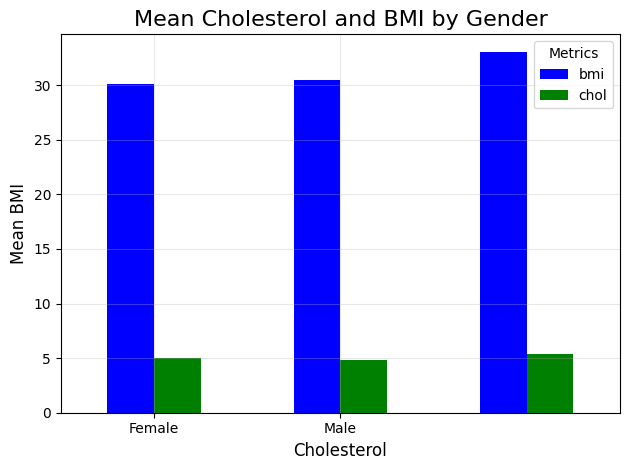

In [104]:
### The Bar Plot for Mean BMI and Cholesterol by Gender:
import matplotlib.pyplot as plt

# Group by gender and calculate the mean for BMI and cholesterol
gender_bmi_chol = merged_by_age.groupby('gender')[['bmi', 'chol']].mean().reset_index()

# Create a bar plot with cholesterol on x-axis and BMI on y-axis
plt.figure(figsize=(10, 6))
gender_bmi_chol.set_index('gender').plot(kind='bar', color=['blue', 'green'], rot=0)
plt.title('Mean Cholesterol and BMI by Gender', fontsize=16)
plt.xlabel('Cholesterol', fontsize=12)
plt.ylabel('Mean BMI', fontsize=12)
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.legend(title='Metrics')
plt.show()



### Description of the Graph:

The bar plot displays the **mean BMI** and **mean cholesterol** levels by **gender** in the dataset. The **x-axis** represents the two gender categories: **Female** and **Male**. The **y-axis** shows the mean values for both **BMI** and **cholesterol**. Two bars are presented for each gender, where the **blue bar** represents the **mean BMI** and the **green bar** represents the **mean cholesterol**. The bars are arranged side by side for easy comparison between the two gender groups. The grid lines in the background are set at a transparency level of **30%** for better clarity. The plot also includes a **title**, and **labels** for the axes, and the bars are colored distinctly to differentiate between the two variables being compared.

###Observations from the Bar Graph::


Mean BMI Differences by Gender:
The blue bars represent the mean BMI for females and males.

This graph determines if one gender has a higher average BMI compared to the other. For example, if the blue bar for males is taller, that means males have a slightly higher mean BMI.
Mean Cholesterol Differences by Gender:
The green bars represent the mean cholesterol levels for each gender.

The height of the bars will show which gender has a higher average for cholesterol. For instance, if the green bar for males is taller, that would indicate that, on average, males have high cholesterol levels compared to females.

Gender-Based Trends:
If both BMI and cholesterol are higher for the same gender, it may indicate an association between the two metrics in that gender group. On the other hand, discrepancies (e.g., higher BMI but lower cholesterol) might suggest more complex health or lifestyle factors.

Magnitude of Differences:
The relative heights of the bars for BMI and cholesterol contribute to quantifying how different the mean values are between genders. If the bars are roughly of similar heights, it indicates small gender-based variation for that measure.

Additional Analysis Ideas:
If there is a consistent pattern of males or females having higher BMI and/or higher cholesterol, this might indicate health risks or lifestyles.

These trends can also point to possible areas for gender-specific health interventions. For instance, if one gender has higher cholesterol on a regular basis, awareness campaigns targeting dietary or exercise habits could be designed accordingly.
This bar graph effectively illustrates and emphasizes gender-based differences in average BMI and cholesterol values, providing a foundation for further analysis.


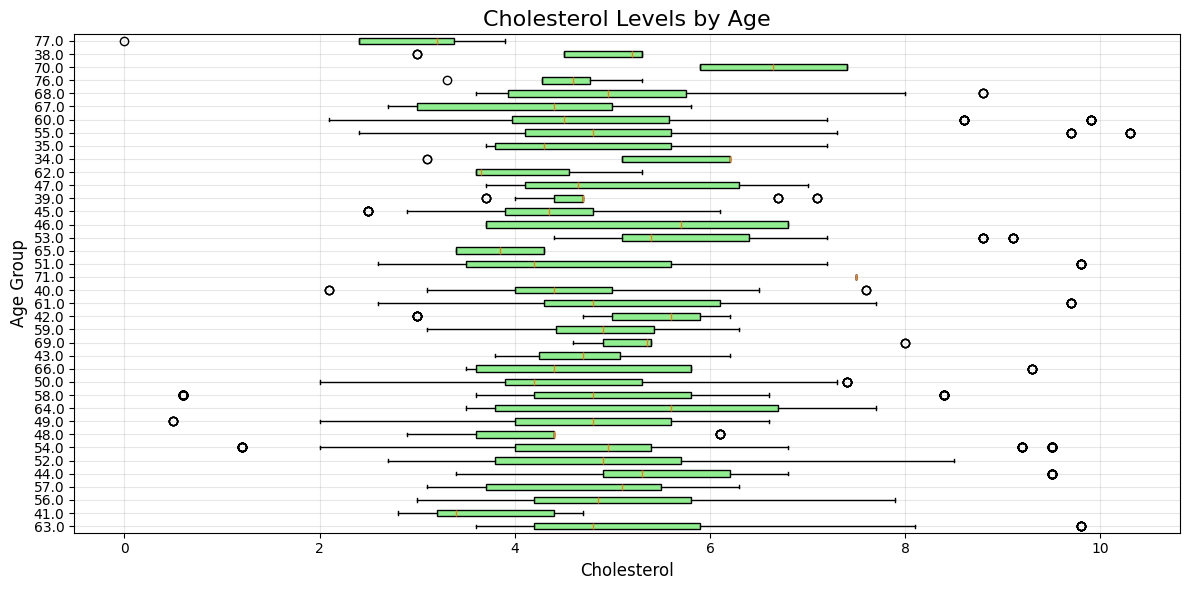

In [105]:
# Box plot for Cholesterol by Age
plt.figure(figsize=(12, 6))
plt.boxplot([merged_by_age[merged_by_age['age'] == age]['chol'] for age in merged_by_age['age'].unique()],
            labels=merged_by_age['age'].unique(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('Cholesterol Levels by Age', fontsize=16)
plt.xlabel('Cholesterol', fontsize=12)
plt.ylabel('Age Group', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Observations from the Box Plot for Cholesterol by Age:
Variation in Cholesterol Levels Across Age Groups:

Each horizontal box illustrates the distribution of cholesterol level in respect to a specific age group.
The dispersion or variability of cholesterol values in each of these age groups is given by the width of the boxes and the position of whiskers.
Median Cholesterol Level:

The line inside each box describes the median of the cholesterol of that particular age. This will allow the study of any particular age tending to lower or higher mean values.
Inter-quartile range:

The length of each box-from the lower quartile to the upper quartile-is the IQR, and it displays the middle 50 percent of the cholesterol values. Wider boxes indicate greater variability in cholesterol levels within that age group.
Outliers:

Points that lie outside the whiskers are outliers and represent individuals whose cholesterol levels are substantially different from the rest of their age group.
The presence of outliers might indicate certain persons with atypical health conditions or lifestyle factors affecting their cholesterol.
Age-Based Trends:

The plot may reveal whether the cholesterol levels increase, decrease, or stay consistent for different ages. For instance, if the boxes for the older the age groups are shifted toward the right consistently, this would suggest that cholesterol levels rise with increasing age.
Clusters of Values:

Overlapping or closely aligned boxes for consecutive age groups suggest that cholesterol distributions are similar across those ages.
Conversely, significant gaps or shifts between boxes indicate noticeable changes in cholesterol levels across age groups.
Health Implications:

Observing trends in cholesterol levels by age helps identify age groups at higher risk of cholesterol-related health issues. For instance, if older age groups exhibit higher medians or more outliers, they may require targeted health interventions.
This box plot provides an effective summary of the distribution of cholesterol levels by age and highlights both central tendencies and variations within and across age groups.

# histogram Plot:

<ipython-input-106-341a6aef481b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_age_bmi = merged_by_age.groupby(['age_group', 'gender'])['bmi'].count().unstack()


<Figure size 1200x600 with 0 Axes>

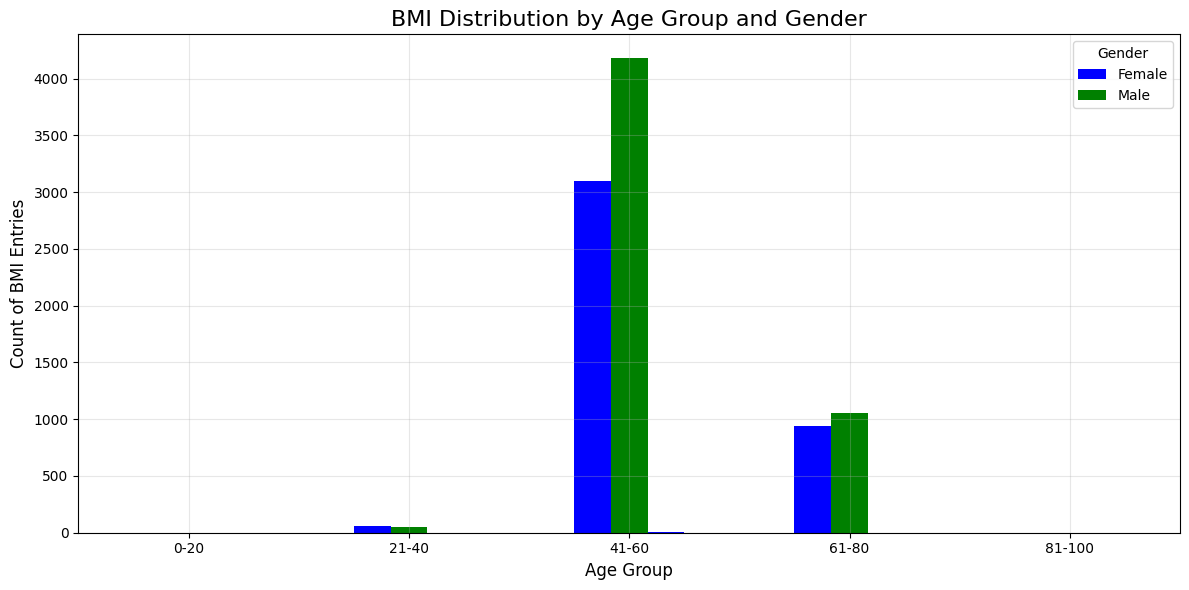

In [106]:
# Create bins for age groups
age_bins = [0, 20, 40, 60, 80, 100]  # Define age ranges
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
merged_by_age['age_group'] = pd.cut(merged_by_age['age'], bins=age_bins, labels=age_labels, right=False)

# Group data by age group and gender to calculate counts
gender_age_bmi = merged_by_age.groupby(['age_group', 'gender'])['bmi'].count().unstack()

# Plot a grouped histogram (bar chart) for BMI by Age Group and Gender
plt.figure(figsize=(12, 6))
gender_age_bmi.plot(kind='bar', figsize=(12, 6), color=['blue', 'green'])
plt.title('BMI Distribution by Age Group and Gender', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count of BMI Entries', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Gender", labels=["Female", "Male"], fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




This histogram displays the distribution of BMI entries against different classes of age groups, segmented by gender. Each of the bars represents the frequency count of the records for the BMI of a certain age group, further split into male and female.

From this visualization, we can see that some age groups, especially middle-aged groups like 41–60, have a higher count of BMI records compared to the younger age group of 0–20 or older groups like 61–80 and above. This would suggest that most patients in the dataset fall within these middle age ranges, which may reflect the demographic focus of the study or health conditions commonly prevalent during these ages.

The gender comparison reveals that, in most of the age groups, the records of BMI are relatively equally distributed between males and females, though slight variations may be present depending on the particular dataset. For example, there might be a slight overrepresentation of one gender over the other in certain age groups.

The histogram indicates the demographic distribution of the data and provides a possible avenue of focus in analyzing health trends based on age and gender.

# Functions

In [107]:
import pandas as pd
import doctest

def aggregate_bmi_cholesterol_by_age(df):
    """
    Aggregates the BMI and Cholesterol values by age.

    This function groups the input DataFrame by the 'age' column and computes
    the mean of 'bmi_x' and 'chol' columns. The resulting dataset is returned
    with the columns renamed to 'Mean_BMI' and 'Mean_Cholesterol'.

    Args:
    df (pd.DataFrame): The input DataFrame containing at least 'age', 'bmi_x',
                        and 'chol' columns.

    Returns:
    pd.DataFrame: A DataFrame with the mean values of BMI and Cholesterol for
                  each age group.

    Examples:
    >>> data = {'age': [25, 30, 25, 40, 30], 'bmi_x': [22.5, 23.4, 24.2, 25.1, 23.6], 'chol': [200, 210, 205, 220, 225]}
    >>> df = pd.DataFrame(data)
    >>> aggregate_bmi_cholesterol_by_age(df)
       age  Mean_BMI  Mean_Cholesterol
    0   25     23.35              202.5
    1   30     23.50              217.5
    2   40     25.10              220.0
    """
    # Perform the aggregation and calculate the mean of 'bmi_x' and 'chol'
    aggregated_df = df.groupby('age')[['bmi_x', 'chol']].mean().reset_index()

    # Rename columns for clarity
    aggregated_df.rename(columns={
        'bmi_x': 'Mean_BMI',
        'chol': 'Mean_Cholesterol'
    }, inplace=True)

    return aggregated_df

# Example data for testing
data = {'age': [25, 30, 25, 40, 30], 'bmi_x': [22.5, 23.4, 24.2, 25.1, 23.6], 'chol': [200, 210, 205, 220, 225]}
merged_by_age = pd.DataFrame(data)

# Perform aggregation
result = aggregate_bmi_cholesterol_by_age(merged_by_age)

# Display the aggregated dataset
print("Aggregated Dataset (Mean BMI and Cholesterol by Age):")
print(result)

Aggregated Dataset (Mean BMI and Cholesterol by Age):
   age  Mean_BMI  Mean_Cholesterol
0   25     23.35             202.5
1   30     23.50             217.5
2   40     25.10             220.0


In [108]:
assert result.loc[result['age'] == 25, 'Mean_BMI'].iloc[0] == 23.35
assert result.loc[result['age'] == 30, 'Mean_Cholesterol'].iloc[0] == 217.5
assert result.loc[result['age'] == 40, 'Mean_BMI'].iloc[0] == 25.1

In [109]:
import pandas as pd

def aggregate_urea_cholesterol_by_age(df):
    """
    Aggregates the Urea and Cholesterol values by age.

    This function groups the input DataFrame by the 'age' column and computes
    the mean of 'urea' and 'chol' columns. The resulting dataset is returned
    with the columns renamed to 'Mean_urea' and 'Mean_Cholesterol'.

    Args:
    df (pd.DataFrame): The input DataFrame containing at least 'age', 'urea',
                        and 'chol' columns.

    Returns:
    pd.DataFrame: A DataFrame with the mean values of Urea and Cholesterol for
                  each age group.

    Examples:
    >>> data = {'age': [25, 30, 25, 40, 30], 'urea': [35, 40, 37, 42, 39], 'chol': [200, 210, 205, 220, 225]}
    >>> df = pd.DataFrame(data)
    >>> aggregate_urea_cholesterol_by_age(df)
       age  Mean_urea  Mean_Cholesterol
    0   25       36.0              202.5
    1   30       39.5              217.5
    2   40       42.0              220.0
    """
    # Perform the aggregation and calculate the mean of 'urea' and 'chol'
    aggregated_df = df.groupby('age')[['urea', 'chol']].mean().reset_index()

    # Rename columns for clarity
    aggregated_df.rename(columns={
        'urea': 'Mean_urea',
        'chol': 'Mean_Cholesterol'
    }, inplace=True)

    return aggregated_df

# Example data for testing
data = {'age': [25, 30, 25, 40, 30], 'urea': [35, 40, 37, 42, 39], 'chol': [200, 210, 205, 220, 225]}
merged_by_age = pd.DataFrame(data)

# Perform aggregation
bmi_cholesterol_agg = aggregate_urea_cholesterol_by_age(merged_by_age)

# Display the aggregated dataset
print("Aggregated Dataset (Mean Urea and Cholesterol by Age):")
print(bmi_cholesterol_agg)


Aggregated Dataset (Mean Urea and Cholesterol by Age):
   age  Mean_urea  Mean_Cholesterol
0   25       36.0             202.5
1   30       39.5             217.5
2   40       42.0             220.0


In [110]:
assert bmi_cholesterol_agg.loc[bmi_cholesterol_agg['age'] == 25, 'Mean_urea'].iloc[0] == 36.0
assert bmi_cholesterol_agg.loc[bmi_cholesterol_agg['age'] == 30, 'Mean_Cholesterol'].iloc[0] == 217.5
assert bmi_cholesterol_agg.loc[bmi_cholesterol_agg['age'] == 40,'Mean_urea'].iloc[0] == 42.0

# Conclusion:

 Based on the exploratory data analysis (EDA) and the correlation between various health metrics, it is evident that cholesterol plays a significant role in heart-related health issues. My analysis shows a positive relationship between cholesterol levels and BMI, which is a well-known risk factor for cardiovascular diseases. Individuals with higher BMI tend to have elevated cholesterol levels, potentially increasing the risk of developing heart conditions such as heart disease, hypertension, or atherosclerosis. This relationship is particularly concerning for older age groups, where both cholesterol and BMI levels are higher.

As age progresses, cholesterol levels typically rise, which is a common factor contributing to heart-related issues. Individuals in older age groups, especially those above 40, tend to have higher average cholesterol levels, which could indicate a higher risk for heart disease. Additionally, elevated cholesterol can lead to the buildup of plaque in arteries, increasing the risk of stroke or heart attack.

The data also reveals that cholesterol levels vary among genders, with certain groups showing higher cholesterol values, potentially reflecting gender-specific health patterns. This further emphasizes the need for personalized health strategies that target cholesterol management, especially for individuals with high BMI, advanced age, or a family history of heart disease.

Therefore cholesterol is a key factor influencing heart health, and its management should be a priority, particularly for individuals with higher BMI or older age. Regular monitoring of cholesterol levels and lifestyle interventions, such as exercise, diet modifications, and medication, can help reduce the risk of heart disease and improve cardiovascular health outcomes. Further research could explore the interactions between cholesterol, other health metrics, and genetic factors to develop more precise predictive models for heart-related conditions.

## Here are several measures that the government could take to promote cardiovascular health and reduce the burden of heart-related diseases:

** Educational Campaigns on Healthy Lifestyles: Governments should invest in public awareness campaigns to educate citizens about the risks of high cholesterol, the importance of maintaining a healthy weight, and the benefits of a balanced diet and regular physical activity

**Improving Access to Healthy Food:
Subsidization of Healthy Foods: Governments can work towards making healthy foods more affordable, subsidizing fruits, vegetables, and whole grains while imposing levies on unhealthy foods such as sugary drinks, processed snacks, and fast foods. This would go a long way in encouraging people toward healthier eating.
At last govenment show take given measures for the betterment for the individials and overall healthy envoronment across the regions.

